# Overview

This dataset contains medical data used for predicting heart disease. The data includes various attributes such as age, sex, chest pain type (cp), resting blood pressure (trestbps), cholesterol (chol), fasting blood sugar (fbs), resting electrocardiographic results (restecg), maximum heart rate achieved (thalach), exercise-induced angina (exang), and ST depression induced by exercise relative to rest (oldpeak).

# 1. Import Libraries

In [2]:
# Data wrangling
import pandas as pd
import numpy as np
import missingno
from collections import Counter

# Data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning models
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier

# Model evaluation
from sklearn.model_selection import cross_val_score

# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

# 2. Import and read the data

In [3]:
heart_d_data = pd.read_csv('heart-disease.csv')

In [5]:
## Lets take a view of first five rows
heart_d_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
heart_d_data.shape
## This dataset consist of 303 rows and 14 columns

(303, 14)

# 3. Data Description 

age: Age of the patient (in years)

sex: Sex of the patient (1 = male, 0 = female)

cp: Chest pain type (1-4)

trestbps: Resting blood pressure (in mm Hg on admission to the hospital)

chol: Serum cholesterol in mg/dl

fbs: Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)

restecg: Resting electrocardiographic results (0-2)

thalach: Maximum heart rate achieved

exang: Exercise-induced angina (1 = yes; 0 = no)

oldpeak: ST depression induced by exercise relative to rest

# 4. Exploratory Data Analysis (EDA)

## 4.1 Data types, missing data and summary statistics

In [9]:
## Non-null count and data types of dataset
heart_d_data.info()
## It seems like there is no mising values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
## Checking for missinfg data in dataset
heart_d_data.isnull().sum().sort_values(ascending=False)
## As we observed there are no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

<Axes: >

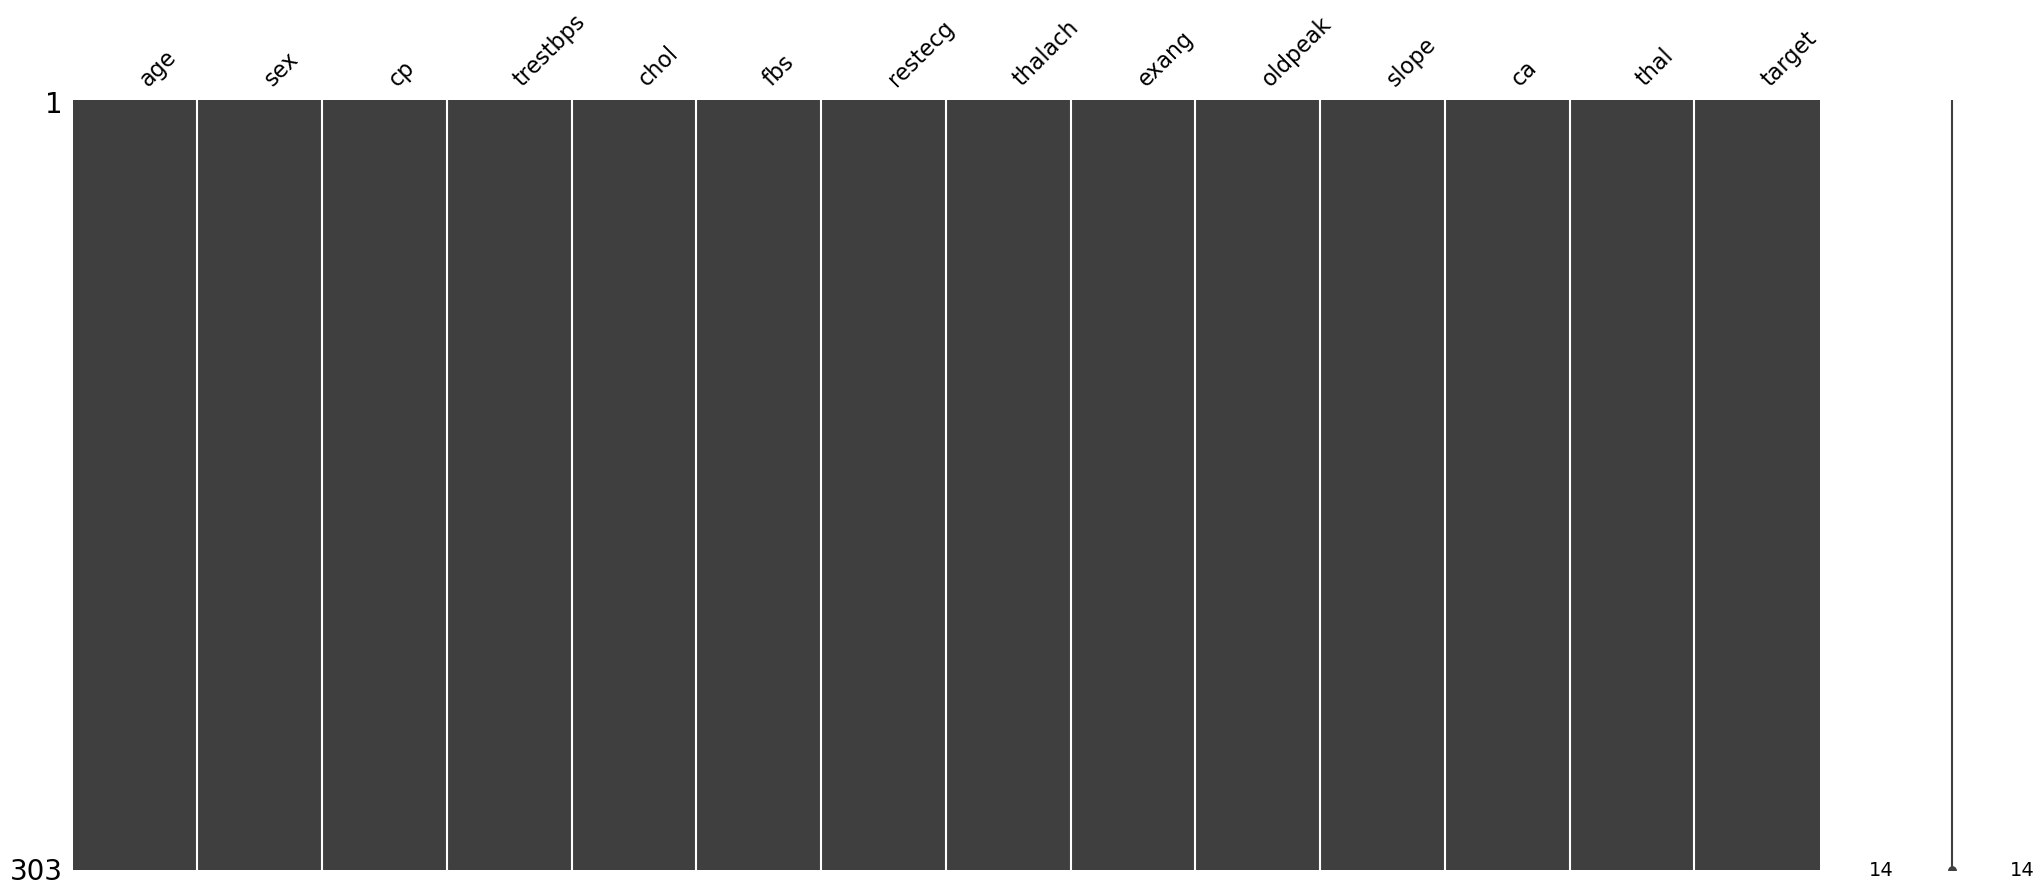

In [14]:
missingno.matrix(heart_d_data)
## Same observation here

In [15]:
## Descriptives statistics
heart_d_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


##  4.2 Feature analysis

In this step we will identify the numerical and categorical variables and we will analize them appropriately

According to what we observed in the descriptves above

Categorical variables : sex, cp, fbs, restreg, exang

Numerical variables : age, trestbps, chol, thalach, oldpeak

In [20]:
## We will drop the rest columns due to the lacking of information about them
useless_columns = ['slope','ca','thal']
heart_d_data.drop(useless_columns, axis = 1, inplace=True)

In [21]:
heart_d_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
0,63,1,3,145,233,1,0,150,0,2.3,1
1,37,1,2,130,250,0,1,187,0,3.5,1
2,41,0,1,130,204,0,0,172,0,1.4,1
3,56,1,1,120,236,0,1,178,0,0.8,1
4,57,0,0,120,354,0,1,163,1,0.6,1


## 4.2.1 Categorical variables

Categorical variables : sex, cp, fbs, restreg, exang

## Categorical Variable Sex

In [24]:
## Value counts of the sex column
heart_d_data['sex'].value_counts()
## It seems that there are more male patients in the dataset

sex
1    207
0     96
Name: count, dtype: int64

In [26]:
## Mean of heart disease by sex
heart_d_data[['sex', 'target']].groupby('sex', as_index=False).mean().sort_values(by = 'target', ascending = False)
## It seems like female mostly adapt heart disease

,sex,target
0,0,0.750000
1,1,0.449275


Text(0.5, 1.0, 'Probability of developing heart disease by sex')

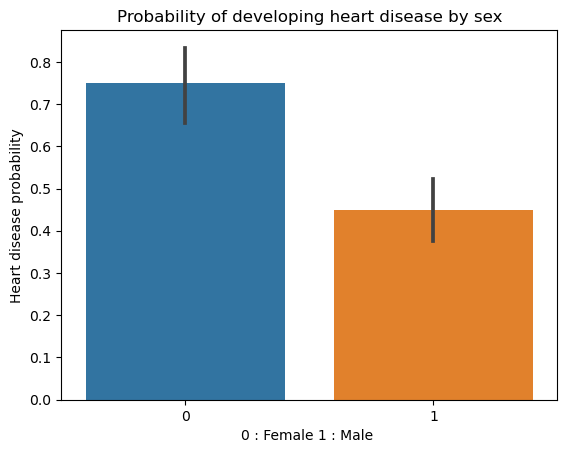

In [30]:
## Lets visualize the results
sns.barplot(x = 'sex', y = 'target', data = heart_d_data)
plt.ylabel('Heart disease probability')
plt.xlabel('0 : Female 1 : Male ')
plt.title('Probability of developing heart disease by sex')

## Categorical variable cp

In [32]:
heart_d_data['cp'].value_counts()
## The majority of patients had no chest pain and ony 23 patients had severe chest pain

cp
0    143
2     87
1     50
3     23
Name: count, dtype: int64

In [35]:
heart_d_data[['cp', 'target']].groupby('cp', as_index=False).mean().sort_values(by = 'target', ascending = False)
## Chest pain type 1 is most correlated with heart diseas as well as 82% of patients with type 1 chest pain had heart disease

,cp,target
1,1,0.820000
2,2,0.793103
3,3,0.695652
0,0,0.272727


Text(0.5, 1.0, 'Probability of having heart disease by chest pain categories')

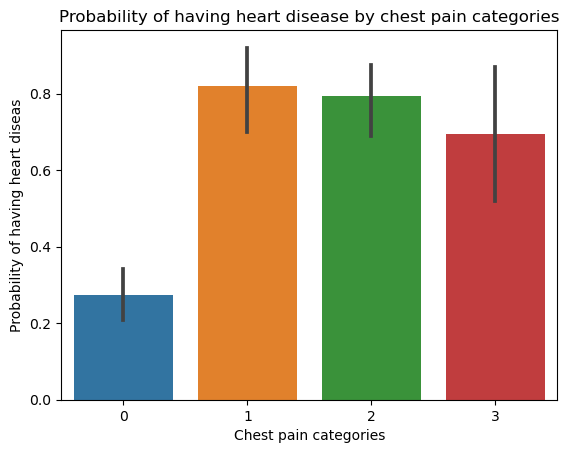

In [38]:
sns.barplot(x = 'cp', y = 'target', data = heart_d_data)
plt.xlabel('Chest pain categories')
plt.ylabel('Probability of having heart diseas')
plt.title('Probability of having heart disease by chest pain categories')
## Chest pain 1 is most correlated with 2 and 3 following 

## Categorical variable fbs

In [40]:
heart_d_data['fbs'].value_counts()
## 258 out of 303 patients had fasting blood sugar less that 120 mg/dl

fbs
0    258
1     45
Name: count, dtype: int64

In [42]:
heart_d_data[['fbs','target']].groupby('fbs', as_index=False).mean().sort_values(by = 'target', ascending = False)
## 55% of patients with fasting blood sugar less that 120mg/dl had developted heart disease

,fbs,target
0,0,0.550388
1,1,0.511111


Text(0.5, 1.0, 'Probability of having heart disease by blood sugar metre')

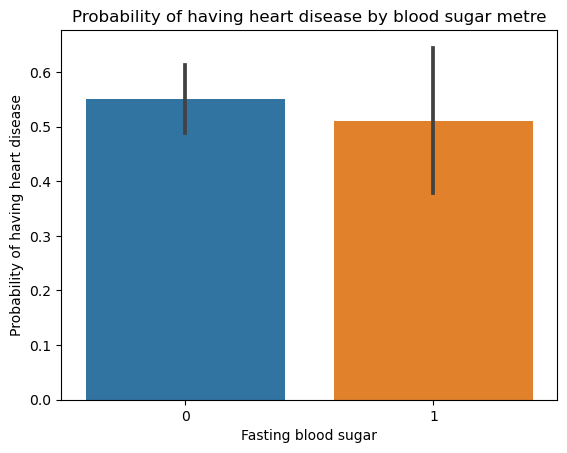

In [44]:
sns.barplot(x = 'fbs', y = 'target', data = heart_d_data)
plt.xlabel('Fasting blood sugar')
plt.ylabel('Probability of having heart disease')
plt.title('Probability of having heart disease by blood sugar metre')
## More patients with fasting blood sugar less that 120mg/dl had decelopted heart disease

## Categorical variable restecg

In [53]:
heart_d_data['restecg'].value_counts()
## As we can see 152 partiens had ecg with abnormalities on ST or T wave
## 147 had a completely normal ecg
## Finaly 4 of them had signs of left ventricular hypertrophy

restecg
1    152
0    147
2      4
Name: count, dtype: int64

In [55]:
heart_d_data[['restecg','target']].groupby('restecg', as_index=False).mean().sort_values(by = 'target', ascending = False)
## 63% of patients with abnormalities in ST or T wave had heart disease
## 46% of patients with normal ecg had heart disease
## 25% of parients with signs of left ventricular hypertrophy had heart disease


,restecg,target
1,1,0.631579
0,0,0.462585
2,2,0.250000


Text(0.5, 1.0, 'Probability of having heart disease by ecg type')

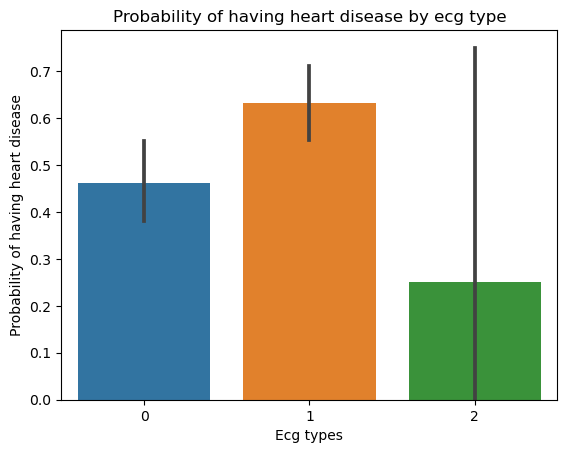

In [56]:
sns.barplot(x = 'restecg', y = 'target', data = heart_d_data)
plt.xlabel('Ecg types')
plt.ylabel('Probability of having heart disease')
plt.title('Probability of having heart disease by ecg type')

## Categorical variable exang

In [61]:
print(heart_d_data['exang'].value_counts())
heart_d_data['exang'].value_counts() / len(heart_d_data['exang'])
## 99 individuals or 67.3% patienst had exercise-induced angina 

exang
0    204
1     99
Name: count, dtype: int64


exang
0    0.673267
1    0.326733
Name: count, dtype: float64

In [63]:
heart_d_data[['exang', 'target']].groupby('exang', as_index=False).mean().sort_values(by = 'target', ascending = False)
## 69% of patients without exercise-induced angina had heart disease

,exang,target
0,0,0.696078
1,1,0.232323


Text(0.5, 1.0, 'Probability of heart disease related with exercise induced angina')

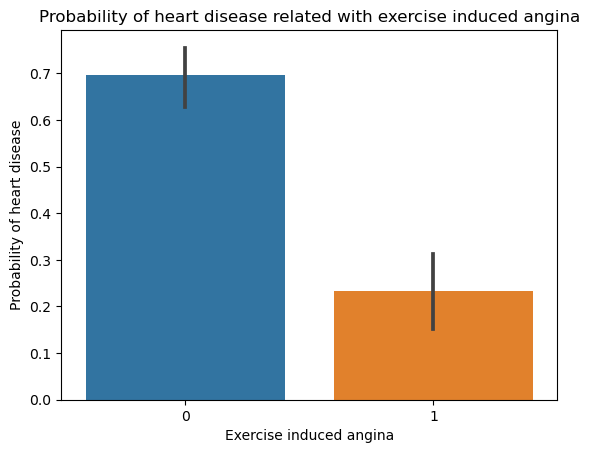

In [65]:
sns.barplot(x = 'exang', y = 'target', data = heart_d_data)
plt.xlabel('Exercise induced angina')
plt.ylabel('Probability of heart disease')
plt.title('Probability of heart disease related with exercise induced angina')

# 4.2.2 Numerical variables

The numerical variables of the dataset are age, trestbps, chol, thalach and oldpeak

## Numerical variables correlation with heart disease

<Axes: >

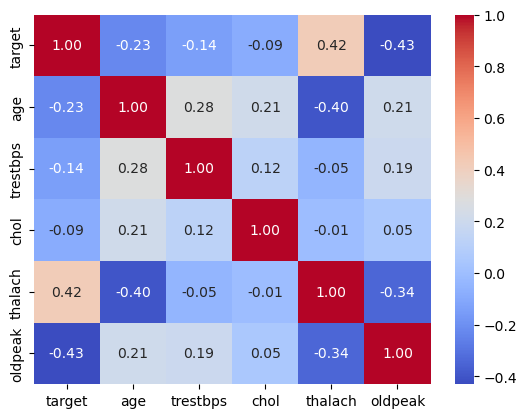

In [94]:
sns.heatmap(heart_d_data[['target', 'age','trestbps', 'chol', 'thalach', 'oldpeak']].corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')
## ST depression seems to have a substantial negative correlation with heart disease (oldpeak)
## Maximum heart rate achieved seems to have a substantial porsitive correlaion with heart disease (thalack)


## Numerical variable age

In [103]:
heart_d_data['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

Text(0.5, 1.0, 'Patients age distribution')

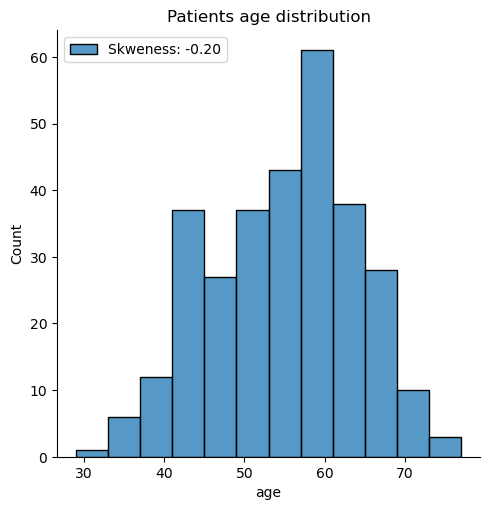

In [105]:
## Visualizing Age
sns.displot(heart_d_data['age'], label = 'Skweness: %.2f'%(heart_d_data['age'].skew()))
plt.legend(loc = 'best')
plt.title('Patients age distribution')
## Age follows approximately normal distribution

<Axes: >

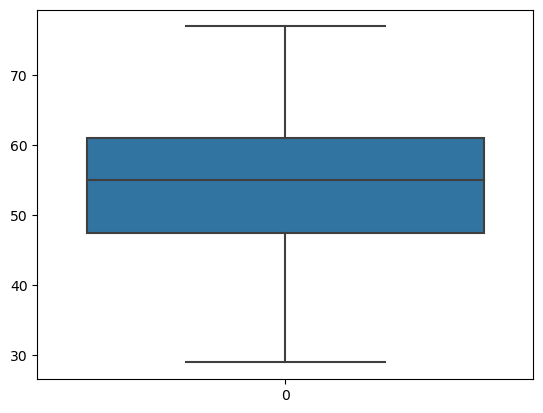

In [107]:
sns.boxplot(heart_d_data['age'])
## As we can see there are no outliers

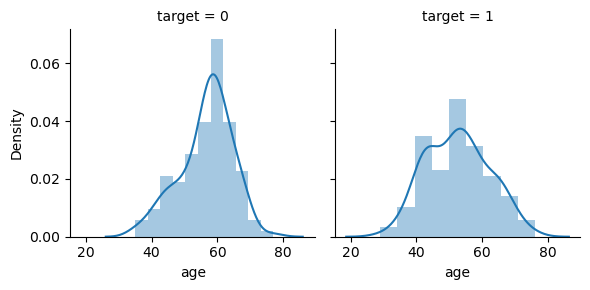

In [112]:
## Age distribution by heart disease
age_d = sns.FacetGrid(heart_d_data, col = 'target')
age_d.map(sns.distplot, 'age')

Text(0, 0.5, 'Age distriution by heart disease')

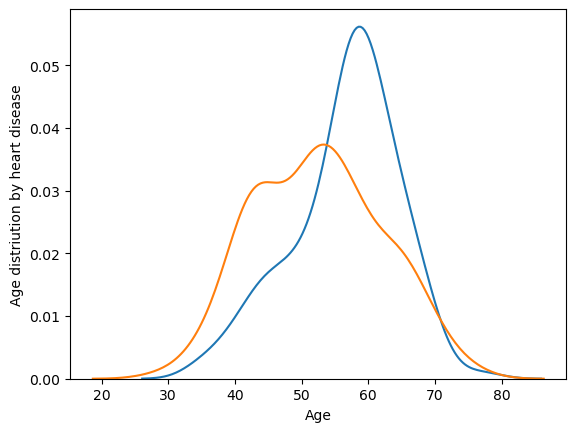

In [113]:
sns.kdeplot(heart_d_data['age'][heart_d_data['target'] == 0], label = 'Without heart disease')
sns.kdeplot(heart_d_data['age'][heart_d_data['target'] == 1], label = 'With heart disease')
plt.xlabel('Age')
plt.ylabel('Age distriution by heart disease')

## Numerical vgariable trestbps 

In [ ]:
## Getting the descriptives for systolic blood preassure
heart_d_data['trestbps'].describe()

Text(0.5, 1.0, 'Patients blood pressure distrinution')

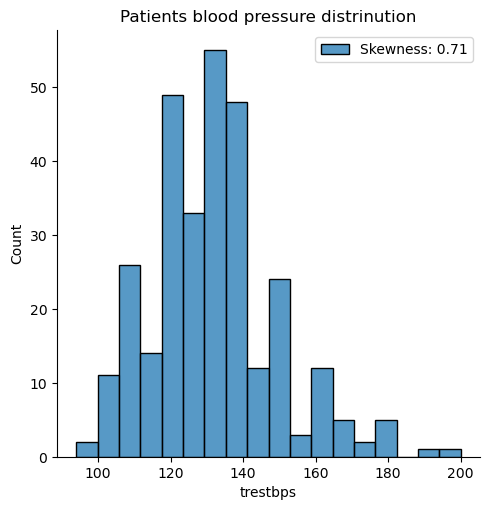

In [117]:
## Visualizing the skweness
sns.displot(heart_d_data['trestbps'],label = 'Skewness: %.2f'%(heart_d_data['trestbps'].skew()))
plt.legend(loc = 'best')
plt.title('Patients blood pressure distrinution')

<Axes: >

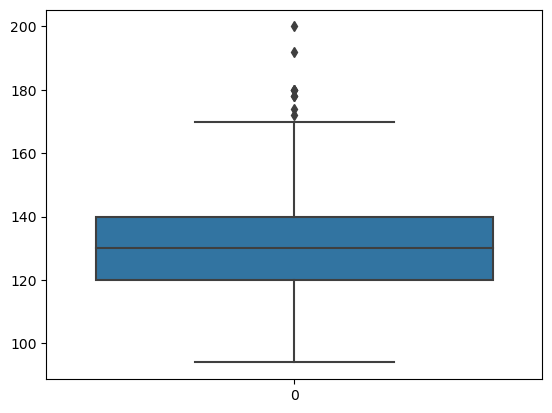

In [85]:
sns.boxplot(heart_d_data['trestbps'])
## As we can see there are a few outliers

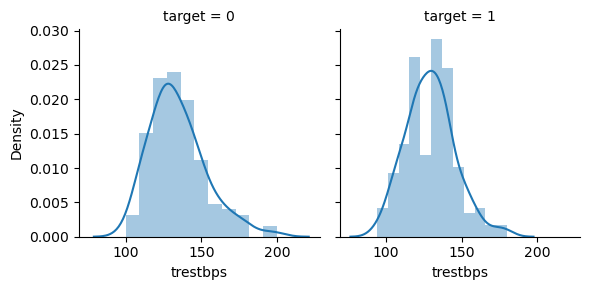

In [88]:
## Hisotgram of blood preassure for patients with and without heart disease
bps = sns.FacetGrid(heart_d_data, col = 'target')
bps.map(sns.distplot, 'trestbps')
## Both categories seems to be skewed

Text(0, 0.5, 'Blood pressure distriution by heart disease')

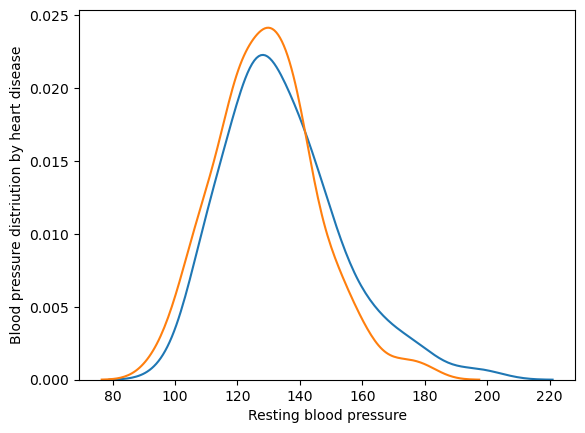

In [89]:
sns.kdeplot(heart_d_data['trestbps'][heart_d_data['target'] == 0], label = 'Without heart disease')
sns.kdeplot(heart_d_data['trestbps'][heart_d_data['target'] == 1], label = 'With heart disease')
plt.xlabel('Resting blood pressure')
plt.ylabel('Blood pressure distriution by heart disease')

In [95]:
## Detecting the outliers z-score method

# Setting the limits
upper_limit = heart_d_data['trestbps'].mean() + 3 * heart_d_data['trestbps'].std()
lower_limit = heart_d_data['trestbps'].mean() - 3 * heart_d_data['trestbps'].std()
print('upper limt :', upper_limit)
print('loewr limit :', lower_limit)

# Detecting the outliers
heart_d_data.loc[(heart_d_data['trestbps'] > upper_limit) | (heart_d_data['trestbps'] < lower_limit)]


upper limt : 184.23819081678892
loewr limit : 79.00933393568636


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
223,56,0,0,200,288,1,0,133,1,4.0,0
248,54,1,1,192,283,0,0,195,0,0.0,0


In [96]:
## Capping the outliers
new_data = heart_d_data.copy()
new_data.loc[new_data['trestbps'] > upper_limit, 'trestbps'] = upper_limit
new_data.loc[new_data['trestbps'] < lower_limit, 'trestbps'] = lower_limit

<Axes: >

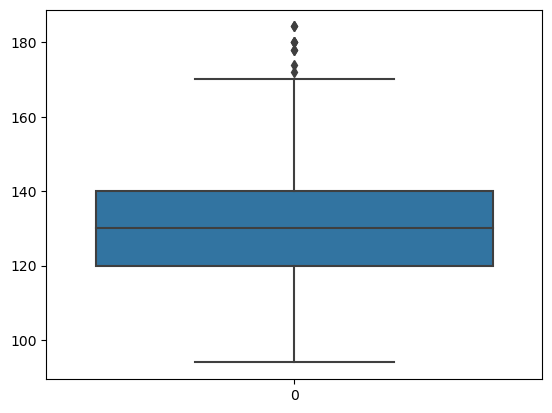

In [100]:
sns.boxplot(new_data['trestbps'])

In [101]:
upper_limit, lower_limit

(184.23819081678892, 79.00933393568636)

## Numerical variable chol 

In [116]:
new_data['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

Text(0.5, 1.0, 'Patients cholisterol distrinution')

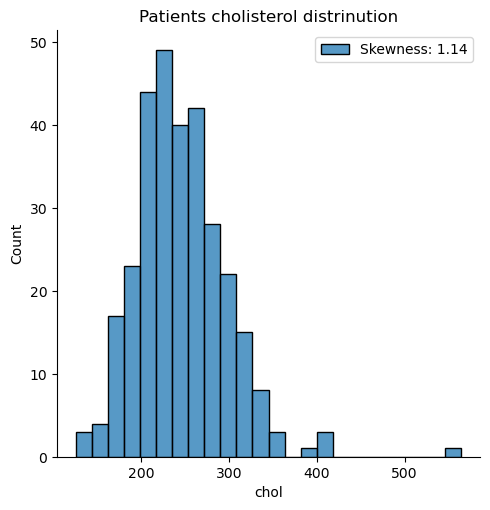

In [119]:
sns.displot(heart_d_data['chol'],label = 'Skewness: %.2f'%(heart_d_data['chol'].skew()))
plt.legend(loc = 'best')
plt.title('Patients cholisterol distrinution')
## Cholisterol seems to be normaly distribted but with a few outliers

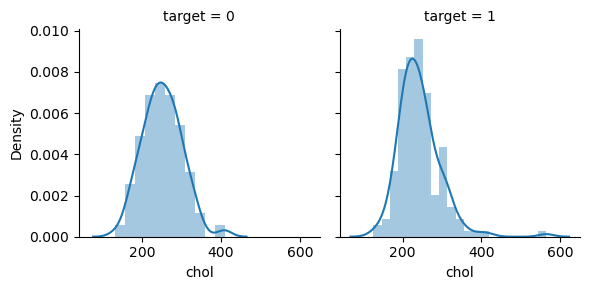

In [129]:
chol = sns.FacetGrid(heart_d_data, col = 'target')
chol.map(sns.distplot, 'chol')
## Cholisterol distribution by heart disease

<Axes: >

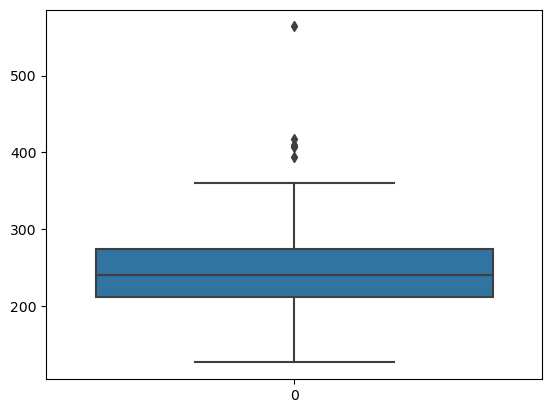

In [121]:
sns.boxplot(new_data['chol'])
## Here the outliers are more obvious

In [122]:
## Detecting the outliers z-score method

# Setting the limits
upper_limit = new_data['chol'].mean() + 3 * new_data['chol'].std()
lower_limit = new_data['chol'].mean() - 3 * new_data['chol'].std()
print('upper limt :', upper_limit)
print('loewr limit :', lower_limit)

# Detecting the outliers
heart_d_data.loc[(new_data['chol'] > upper_limit) | (new_data['chol'] < lower_limit)]


upper limt : 401.75627936643036
loewr limit : 90.77177343885015


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
28,65,0,2,140,417,1,0,157,0,0.8,1
85,67,0,2,115,564,0,0,160,0,1.6,1
220,63,0,0,150,407,0,0,154,0,4.0,0
246,56,0,0,134,409,0,0,150,1,1.9,0


In [123]:
## Capping the outliers
new_data.loc[new_data['chol'] > upper_limit, 'chol'] = upper_limit
new_data.loc[new_data['chol'] < lower_limit, 'chol'] = lower_limit

<Axes: >

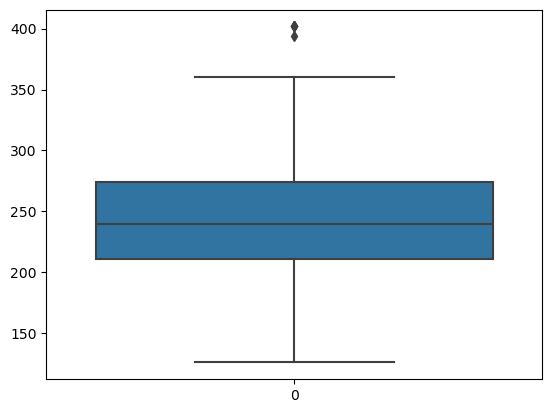

In [125]:
## Here we can see the difference
sns.boxplot(new_data['chol'])

## Numerical varable thalach

Text(0.5, 1.0, 'Maximum heart rate achieved distribution')

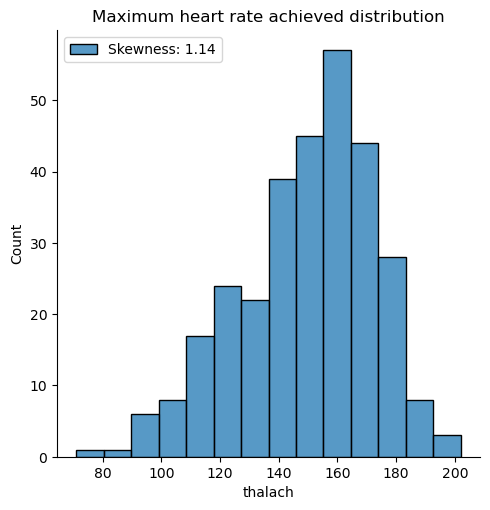

In [127]:
## Lets see the distribution of maximum heart rate
sns.displot(new_data['thalach'], label = 'Skewness: %.2f'%(heart_d_data['chol'].skew()))
plt.legend(loc = 'best')
plt.title('Maximum heart rate achieved distribution')
## The distribution is aproximately normal

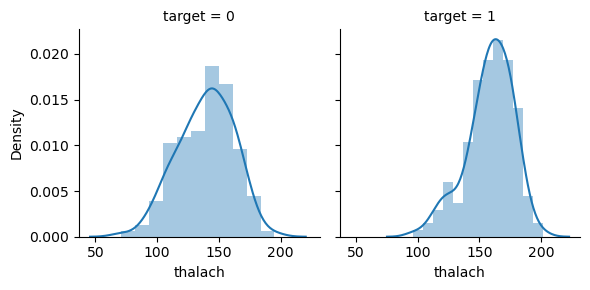

In [131]:
thal = sns.FacetGrid(heart_d_data, col = 'target')
thal.map(sns.distplot, 'thalach')
## Heart rate distribution by heart disease

<Axes: >

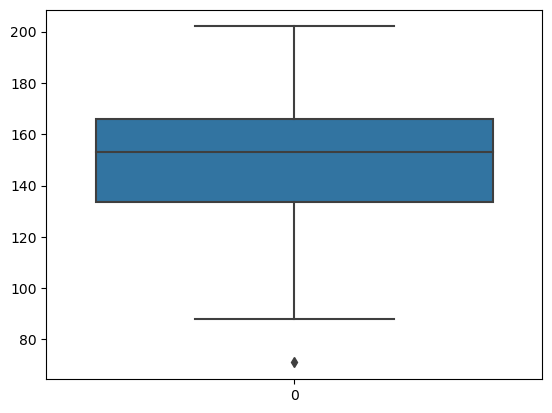

In [134]:
## Lets see if there are outliers
sns.boxplot(new_data['thalach'])
## It seems there is an outlier

In [135]:
## Detecting the outliers z-score method

# Setting the limits
upper_limit = new_data['thalach'].mean() + 3 * new_data['thalach'].std()
lower_limit = new_data['thalach'].mean() - 3 * new_data['thalach'].std()
print('upper limt :', upper_limit)
print('loewr limit :', lower_limit)

# Detecting the outliers
heart_d_data.loc[(new_data['thalach'] > upper_limit) | (new_data['thalach'] < lower_limit)]


upper limt : 218.36234803121093
loewr limit : 80.9313813417264


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
272,67,1,0,120,237,0,1,71,0,1.0,0


In [136]:
## Capping the outliers
new_data.loc[new_data['thalach'] > upper_limit, 'thalach'] = upper_limit
new_data.loc[new_data['thalach'] < lower_limit, 'thalach'] = lower_limit

<Axes: >

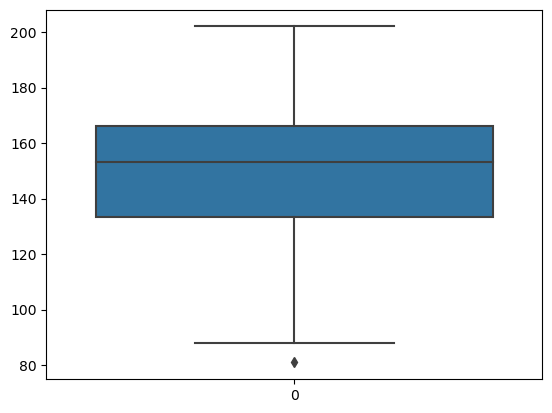

In [138]:
sns.boxplot(new_data['thalach'])
## The outlier point came closer in the boxplot
## We could also drop it as well as is only one observation

## Numerical variable oldpeak

In [139]:
## Getting the distriptives
new_data['oldpeak'].describe()

count    303.000000
mean       1.039604
std        1.161075
min        0.000000
25%        0.000000
50%        0.800000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

Text(0.5, 1.0, 'ST depression distribution')

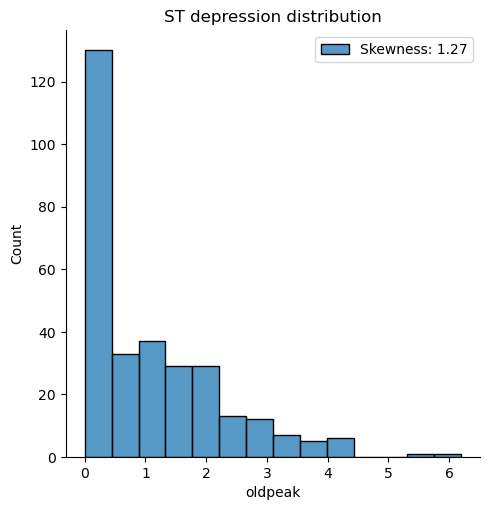

In [142]:
## Checking for distribution
sns.displot(new_data['oldpeak'], label = 'Skewness: %.2f'%(heart_d_data['oldpeak'].skew()))
plt.legend(loc = 'best')
plt.title('ST depression distribution')
## Seems to be hihgly skwed

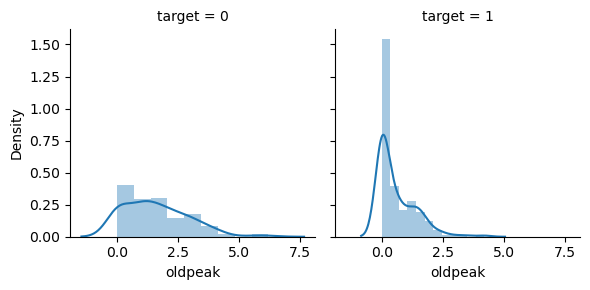

In [143]:
old = sns.FacetGrid(heart_d_data, col = 'target')
old.map(sns.distplot, 'oldpeak')
## ST depression distribution by heart disease

<Axes: >

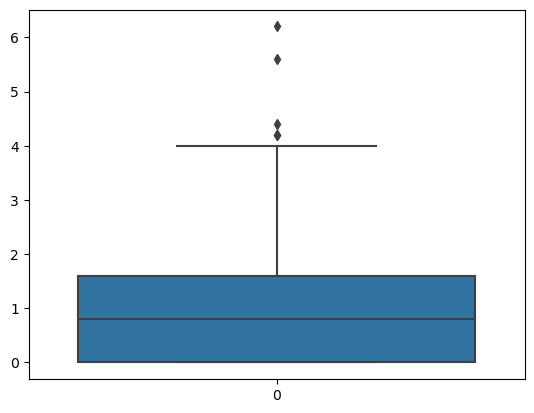

In [145]:
sns.boxplot(new_data['oldpeak'])
## There are a few outliers

In [146]:
## Detecting the outliers z-score method

# Setting the limits
upper_limit = new_data['oldpeak'].mean() + 3 * new_data['oldpeak'].std()
lower_limit = new_data['oldpeak'].mean() - 3 * new_data['oldpeak'].std()
print('upper limt :', upper_limit)
print('loewr limit :', lower_limit)

# Detecting the outliers
heart_d_data.loc[(new_data['oldpeak'] > upper_limit) | (new_data['oldpeak'] < lower_limit)]


upper limt : 4.5228290266019435
loewr limit : -2.4436211058098642


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target
204,62,0,0,160,164,0,0,145,0,6.2,0
221,55,1,0,140,217,0,1,111,1,5.6,0


In [147]:
## Capping the outliers
new_data.loc[new_data['oldpeak'] > upper_limit, 'oldpeak'] = upper_limit
new_data.loc[new_data['oldpeak'] < lower_limit, 'oldpeak'] = lower_limit

<Axes: >

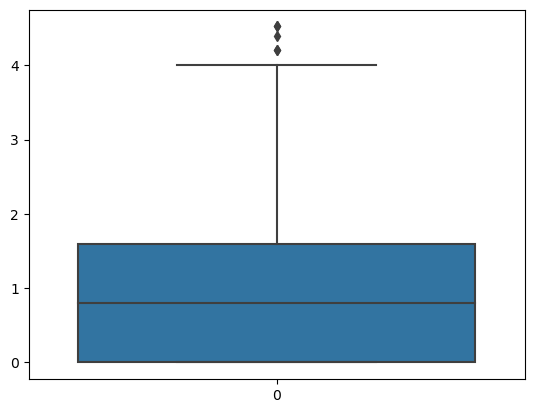

In [148]:
sns.boxplot(new_data['oldpeak'])

# 5. Data preprocessing

In [149]:
## At this point we will handle the missing values(if any)
## We will transform the skwed data
## We will create new fetures by applying feture engineering

## 5.1 Missing values 

In [151]:
new_data.isnull().sum()
## As we can see this data set have no missing values to handle

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
target      0
dtype: int64

## 5.2 Data transformation

Text(0.5, 1.0, 'ST depression distribution')

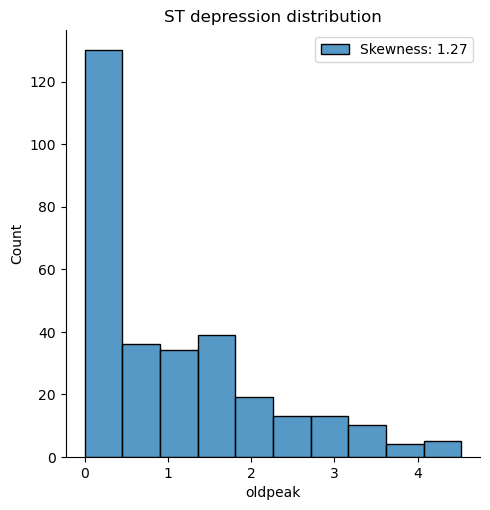

In [152]:
## Recalling EDA, variable oldpeak is positive skwed
sns.displot(new_data['oldpeak'], label = 'Skewness: %.2f'%(heart_d_data['oldpeak'].skew()))
plt.legend(loc = 'best')
plt.title('ST depression distribution')

In [153]:
## So we will apply log transformation
new_data['oldpeak'] = new_data['oldpeak'].map(lambda x: np.log(x) if x > 0 else 0)

Text(0.5, 1.0, 'ST depression distribution')

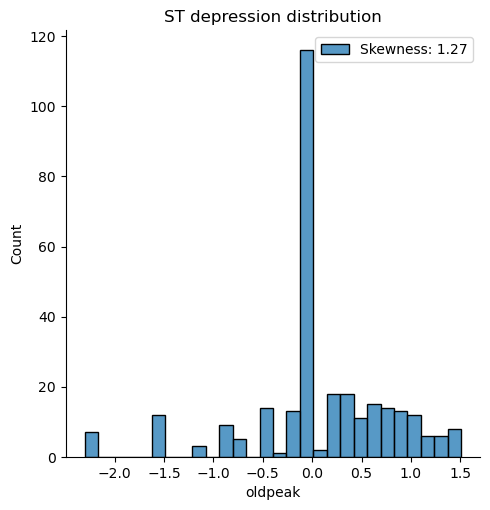

In [154]:
## ST depression distribution after log tranformation
sns.displot(new_data['oldpeak'], label = 'Skewness: %.2f'%(heart_d_data['oldpeak'].skew()))
plt.legend(loc = 'best')
plt.title('ST depression distribution')

## 5.2 Feature engineering

In [188]:
## Engineering age variable
preprocessed_data = new_data.copy()
bins = [0, 35, 50, 65, 100]
labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']
preprocessed_data['age_group'] = pd.cut(preprocessed_data['age'], bins=bins, labels=labels)


In [189]:
## Encoding new features
preprocessed_data['age_group'] = preprocessed_data['age_group'].map({'Young': 1,'Middle-aged':2,'Senior':3,'Elderly':4})


In [190]:
preprocessed_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,age_group
0,63,1,3,145.0,233.0,1,0,150.0,0,0.832909,1,3
1,37,1,2,130.0,250.0,0,1,187.0,0,1.252763,1,2
2,41,0,1,130.0,204.0,0,0,172.0,0,0.336472,1,2
3,56,1,1,120.0,236.0,0,1,178.0,0,-0.223144,1,3
4,57,0,0,120.0,354.0,0,1,163.0,1,-0.510826,1,3


In [191]:
## Creating heart rate reserve feature
preprocessed_data['heart_rate_reserve'] = 220 - preprocessed_data['age'] - preprocessed_data['thalach']

In [192]:
preprocessed_data['oldpeak'].describe()

count    303.000000
mean       0.078638
std        0.734090
min       -2.302585
25%        0.000000
50%        0.000000
75%        0.470004
max        1.509138
Name: oldpeak, dtype: float64

In [193]:
## Combine cp and old peak add an interaction between chest pain and ST depression
preprocessed_data['cp'] = preprocessed_data['cp'] +1
preprocessed_data['cp * oldpeak'] = preprocessed_data['cp'] * preprocessed_data['oldpeak']

In [194]:
## Dropping the old features
preprocessed_data = preprocessed_data.drop(['age','thalach','cp','oldpeak'],axis = 1)

In [195]:
preprocessed_data.head()

,sex,trestbps,chol,fbs,restecg,exang,target,age_group,heart_rate_reserve,cp * oldpeak
0,1,145.0,233.0,1,0,0,1,3,7.0,3.331636
1,1,130.0,250.0,0,1,0,1,2,-4.0,3.758289
2,0,130.0,204.0,0,0,0,1,2,7.0,0.672944
3,1,120.0,236.0,0,1,0,1,3,-14.0,-0.446287
4,0,120.0,354.0,0,1,1,1,3,0.0,-0.510826


In [196]:
## Re-arange the columns
preprocessed_data.columns

Index(['sex', 'trestbps', 'chol', 'fbs', 'restecg', 'exang', 'target',
       'age_group', 'heart_rate_reserve', 'cp * oldpeak'],
      dtype='object')

In [197]:
new_cols = ['age_group', 'heart_rate_reserve', 'cp * oldpeak','sex', 'trestbps', 'chol', 'fbs', 'restecg', 'exang' , 'target',]
preprocessed_data = preprocessed_data[new_cols]
preprocessed_data.head()

,age_group,heart_rate_reserve,cp * oldpeak,sex,trestbps,chol,fbs,restecg,exang,target
0,3,7.0,3.331636,1,145.0,233.0,1,0,0,1
1,2,-4.0,3.758289,1,130.0,250.0,0,1,0,1
2,2,7.0,0.672944,0,130.0,204.0,0,0,0,1
3,3,-14.0,-0.446287,1,120.0,236.0,0,1,0,1
4,3,0.0,-0.510826,0,120.0,354.0,0,1,1,1


# 6. Modeling 

In [260]:
## Difining the features
x = preprocessed_data[['age_group', 'heart_rate_reserve', 'cp * oldpeak','sex', 'trestbps', 'chol', 'fbs', 'restecg', 'exang']]
y = preprocessed_data['target']                       

In [261]:
## Separating the features into train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## 6.1 Scaling the features 

In [265]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# 6.2 Models

### 6.2.1 Logistic Regression Model

In [327]:
## Training the model
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [328]:
## Predicting the test set results
y_pred = classifier.predict(X_test)

In [329]:
## Making the comfusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
log_reg_acc = accuracy_score(y_test, y_pred)
log_reg_acc

[[22  7]
 [ 6 26]]


0.7868852459016393

# 6.2.2 Support Vector Machines

In [330]:
## Training the model
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [331]:
## Predicting the test set results
y_pred = svc.predict(X_test)

In [332]:
## Making the comfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
svm_acc = accuracy_score(y_test, y_pred)
svm_acc

[[20  9]
 [ 8 24]]


0.7213114754098361

### 6.2.3 Gaussian Naive Bayes 

In [333]:
## Training the model
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)

GaussianNB()

In [334]:
## Predicting the test set results
y_pred = svc.predict(X_test)

In [335]:
## Making the comfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
naive_bay_acc = accuracy_score(y_test, y_pred)
naive_bay_acc

[[20  9]
 [ 8 24]]


0.7213114754098361

### 6.2.4 Decision Tree 

In [336]:
## Training the model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [337]:
## Predicting the test set results
y_pred = svc.predict(X_test)

In [338]:
## Making the comfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
dec_tree_acc = accuracy_score(y_test, y_pred)
dec_tree_acc

[[20  9]
 [ 8 24]]


0.7213114754098361

### 6.2.5 Random Foerest 

In [339]:
## Training the model
random_forest = RandomForestClassifier(n_estimators = 100)
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [340]:
## Predicting the test set results
y_pred = svc.predict(X_test)

In [341]:
## Making the comfusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
forest_acc = accuracy_score(y_test, y_pred)
forest_acc

[[20  9]
 [ 8 24]]


0.7213114754098361

## 6.3 Visualization of models accuracy

In [342]:
## As we can see the logistic regression model is the most accurate
models = pd.DataFrame({'Model' : ['Logistic Regression','Support Vector Machines','Gaussian Naive Bayes','Decision Tree','Random Forest'],
                      'Score' : [log_reg_acc,svm_acc,naive_bay_acc,dec_tree_acc,forest_acc]})
models.sort_values(by = 'Score',ascending=False, ignore_index=True)

,Model,Score
0,Logistic Regression,0.786885
1,Support Vector Machines,0.721311
2,Gaussian Naive Bayes,0.721311
3,Decision Tree,0.721311
4,Random Forest,0.721311


## 6.4 Cross validation

In [343]:
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(SVC())
classifiers.append(GaussianNB())
classifiers.append(DecisionTreeClassifier())
classifiers.append(RandomForestClassifier())
len(classifiers)

5

In [344]:
# Create a list which contains cross validation results for each classifier

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier, X_train, y_train, scoring = 'accuracy', cv = 10))

In [345]:
cv_results

[array([0.76      , 0.68      , 0.95833333, 0.83333333, 0.83333333,
        0.625     , 0.66666667, 0.66666667, 0.70833333, 0.79166667]),
 array([0.68      , 0.76      , 0.91666667, 0.83333333, 0.79166667,
        0.66666667, 0.70833333, 0.70833333, 0.70833333, 0.83333333]),
 array([0.64      , 0.72      , 0.91666667, 0.83333333, 0.79166667,
        0.54166667, 0.75      , 0.70833333, 0.79166667, 0.79166667]),
 array([0.72      , 0.68      , 0.66666667, 0.625     , 0.375     ,
        0.45833333, 0.625     , 0.70833333, 0.45833333, 0.625     ]),
 array([0.72      , 0.8       , 0.91666667, 0.70833333, 0.70833333,
        0.625     , 0.58333333, 0.79166667, 0.70833333, 0.83333333])]

In [346]:
# Mean and standard deviation of cross validation results for each classifier  

cv_mean = []
cv_std = []
for cv_result in cv_results:
    cv_mean.append(cv_result.mean())
    cv_std.append(cv_result.std())

In [347]:
cv_res = pd.DataFrame({'Cross Validation Mean': cv_mean, 'Cross Validation Std': cv_std, 'Algorithm': ['Logistic Regression', 'Support Vector Machines', 'Gausian Naive Bayes',  'Decision Tree', 'Random Forest']})
cv_res.sort_values(by = 'Cross Validation Mean', ascending = False, ignore_index = True)

,Cross Validation Mean,Cross Validation Std,Algorithm
0,0.760667,0.077083,Support Vector Machines
1,0.752333,0.097582,Logistic Regression
2,0.748500,0.099019,Gausian Naive Bayes
3,0.739500,0.093470,Random Forest
4,0.594167,0.113701,Decision Tree


Text(0.5, 1.0, 'Cross Validation Scores')

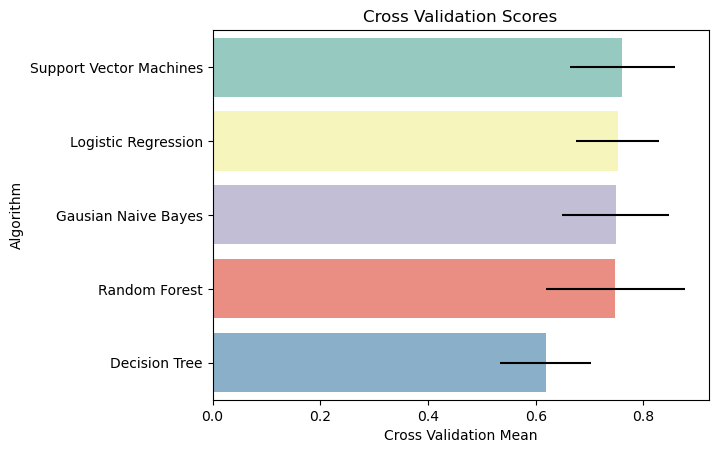

In [318]:
sns.barplot(x='Cross Validation Mean', 
            y='Algorithm', 
            data=cv_res, 
            order=cv_res.sort_values(by='Cross Validation Mean', ascending=False)['Algorithm'], 
            palette='Set3', 
            xerr=cv_std)

plt.ylabel('Algorithm')
plt.title('Cross Validation Scores')


## 6.5 Hyperparameter tuning for SVM

In [348]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.562 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.673 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.735 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.729 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.604 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.708 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [349]:
print("Best parameters: ", grid.best_params_) 
print("Best estimator: ", grid.best_estimator_)

Best parameters:  {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Best estimator:  SVC(C=1, gamma=0.1)


In [350]:
## Despite the cross validation and hyper parameter tuning, the logistic regression seems to have the best accuracy
svc = SVC(C= 1, gamma= 0.1, kernel= 'rbf')
svc.fit(X_train, y_train)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
log_reg_acc = accuracy_score(y_test, y_pred)
log_reg_acc

[[20  9]
 [ 8 24]]


0.7213114754098361

# 7. The best model

In [351]:
## After cross validation and hyper parameter tuning the first one model, the Logistic Regression has the best accuracy
## We end up with this model
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print(cm)
log_reg_acc = accuracy_score(y_test, y_pred)
print('The accuracy of the model is :',round(log_reg_acc,2) *100,'%')

[[22  7]
 [ 6 26]]
The accuracy of the model is : 79.0 %
